In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from data_gen import *
SEED=0

def draw(data,w,marker='o'):
    '''different from the draw func in drawer.py'''
    if w[1] == 0:
        return
    X=data[0];y=data[1]
    ax=plt.gca()
    ax.scatter(X[y==1,0],X[y==1,1],c='r',marker=marker)
    ax.scatter(X[y==-1,0],X[y==-1,1],c='b',marker=marker)

    x1_=np.linspace(np.min(X),np.max(X),X.shape[0])
    x2_=-w[0]/w[1]*x1_

    ax.plot(x1_,x2_)
    ax.set(xlabel='$x_1$',ylabel='$x_2$')

In [2]:
data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)

cat1_idx=np.where(y_train==1)[0]
cat2_idx=np.where(y_train==-1)[0]
mu=[np.average(X_train[y_train==1,:],axis=0),np.average(X_train[y_train==-1,:],axis=0)]
Sigma_c=[(X_train[y_train==1,:]-mu[0]).T@(X_train[y_train==1,:]-mu[0]),(X_train[y_train==-1,:]-mu[1]).T@(X_train[y_train==-1,:]-mu[1])]

S_w=Sigma_c[0]+Sigma_c[1]
w=np.linalg.inv(S_w)@(mu[0]-mu[1])
s=w@(mu[0]+mu[1])/2
print('分类阈值为',s)

分类阈值为 8.203054697990264e-05


train accuray 1.0
test accuray 1.0


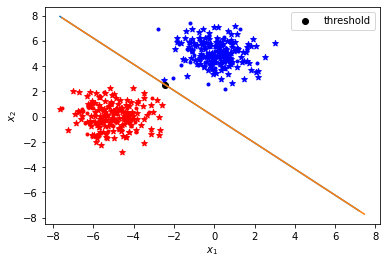

In [3]:
res=np.sign((X_train@w)-s)
plt.figure(1)
data=(X_train,y_train)
draw(data,w,'*')
mistake_idx=np.where(res!=y_train)[0]
train_accuracy=(y_train.shape[0]-len(mistake_idx))/y_train.shape[0]
print('train accuray',train_accuracy)

res=np.sign(X_test@w-s)
data=(X_test,y_test)
draw(data,w,'.')
mistake_idx=np.where(res!=y_test)[0]
test_accuracy=(y_test.shape[0]-len(mistake_idx))/y_test.shape[0]
print('test accuray',test_accuracy)

mu_=(mu[0]+mu[1])/2
plt.scatter(mu_[0],mu_[1],marker='o',color='black',label='threshold')
plt.legend()